In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt



In [2]:
df1 =pd.read_csv("1990_1999.csv")
df2 =pd.read_csv("2000Feb2012.csv")
df3 =pd.read_csv("fromJan2017onwards.csv")
df4 =pd.read_csv("Jan2015toDec2016.csv")
df5 =pd.read_csv("Mar2012toDec2014.csv")
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=0)


In [3]:
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [ ]:
df["remaining_lease"]

In [4]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [12]:
# Define the conversion function
def convert_text_to_years(text):
    
    if pd.notna(text) and isinstance(text, float):
        
    
    parts = text.split(" years ")
    years = int(parts[0])
    months = 0
    
    if len(parts) > 1:
        month_part = parts[1].split(" months")[0]
        if month_part:
            months = int(month_part)

    total_years = years + months / 12

    return total_years

# Assuming df["remaining_lease"] contains the DataFrame with the "remaining_lease" column
# Apply the function to each element in the "remaining_lease" column
df["remaining_lease"] = df["remaining_lease"].apply(convert_text_to_years)

print(df["remaining_lease"])



0    61.333333
Name: remaining_lease, dtype: float64


In [4]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [5]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [6]:
df['remaining_lease'] =df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0


In [ ]:
df['remaining_lease']

In [10]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711640
95.000000      2362
67.000000      2209
69.000000      1911
71.000000      1758
              ...  
96.833333         1
97.583333         1
97.750000         1
41.750000         1
97.250000         1
Name: count, Length: 671, dtype: int64

In [11]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [7]:
df[['resale_year','resale_month']]=df['month'].str.split('-',expand=True)
df.drop('month',axis=1, inplace=True)
df.head(5)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0,1990,01
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0,1990,01
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0,1990,01


In [8]:
df[['storey_upperbound','storey_lowerbound']]=df['storey_range'].str.split('TO',expand=True)

df['storey_upperbound'] = pd.to_numeric(df['storey_upperbound'])
df['storey_lowerbound'] = pd.to_numeric(df['storey_lowerbound'])

df.drop('storey_range',axis=1, inplace=True)
df.head(5)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,01,10,12
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,01,4,6
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,01,10,12
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,01,7,9
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,01,4,6


In [9]:
df['block'] = pd.to_numeric(df['block'],errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'],errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'],errors='coerce')
df['block']= df['block'].fillna(df['block'].mode()[0])

In [10]:
df.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6


In [ ]:
df['town'].value_counts()

In [ ]:
df['flat_type'].value_counts()

In [11]:
df['flat_type'] =  df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [ ]:
df['flat_model'].value_counts()

In [12]:
df['flat_model'] =  df['flat_model'].replace({'Model A':'MODEL A','Improved':'IMPROVED','New Generation':'NEW GENERATION','Simplified':
                                                 'SIMPLIFIED','Standard':'STANDARD','Maisonette':'MAISONETTE','Premium Apartment':'PREMIUM APARTMENT',
                                                 'Apartment':'APARTMENT','Model A-Maisonette':'MODEL A-MAISONETTE','Terrace':'TERRACE','MULTI GENERATION':'Multi Generation',
                                                 'Improved-Maisonette':'IMPROVED-MAISONETTE','2-room':'2-ROOM'
                                                 })

In [ ]:
df['flat_model'].value_counts()

In [13]:
df.duplicated().sum()

2334

In [14]:
df.drop_duplicates(inplace=True)

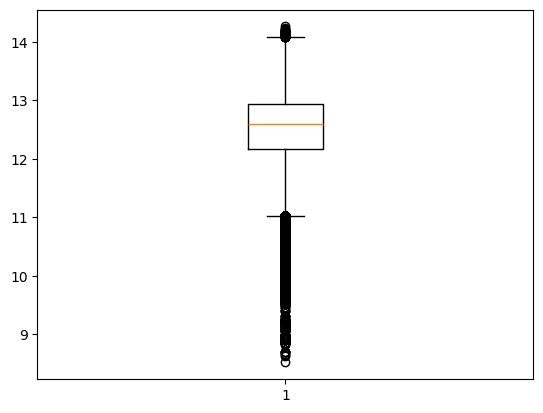

In [16]:
df['resale_price_log'] = np.log(df['resale_price'])
plt.boxplot(df['resale_price_log'])
plt.show()

In [15]:
Q1 = df['resale_price'].quantile(0.25)
Q2 = df['resale_price'].quantile(0.75)
IQR = Q2-Q1
lb=Q1-1.5*IQR
up=Q2+1.5*IQR

In [16]:
df.resale_price = df.resale_price.clip(lb , up)

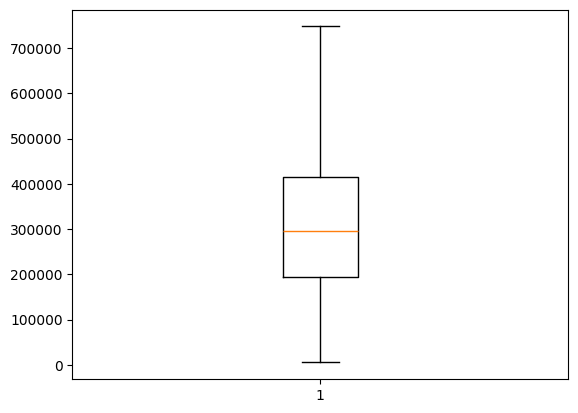

In [17]:
plt.boxplot(df['resale_price'])
plt.show()

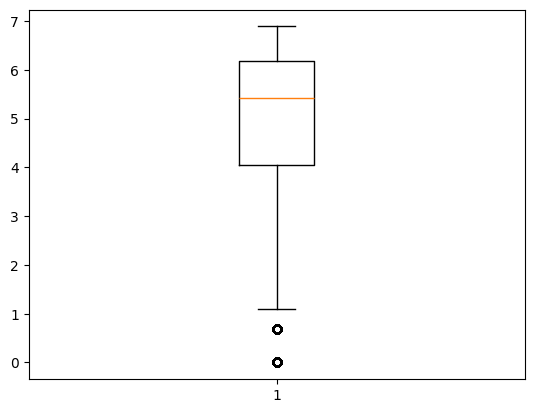

In [20]:
df['block_log'] = np.log(df['block'])
plt.boxplot(df['block_log'])
plt.show()

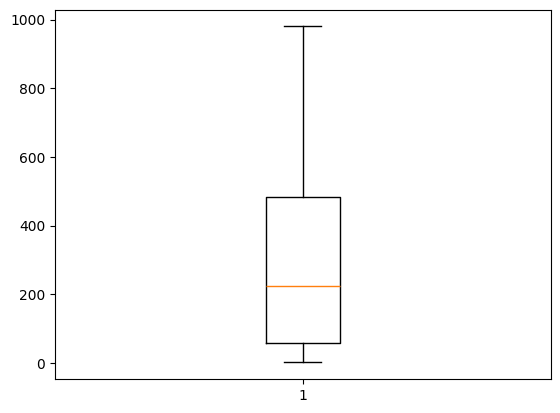

In [18]:
Q1 = df['block'].quantile(0.25)
Q2 = df['block'].quantile(0.75)
IQR = Q2-Q1
lb=Q1-1.5*IQR
up=Q2+1.5*IQR
df.block = df.block.clip(lb , up)
plt.boxplot(df['block'])
plt.show()

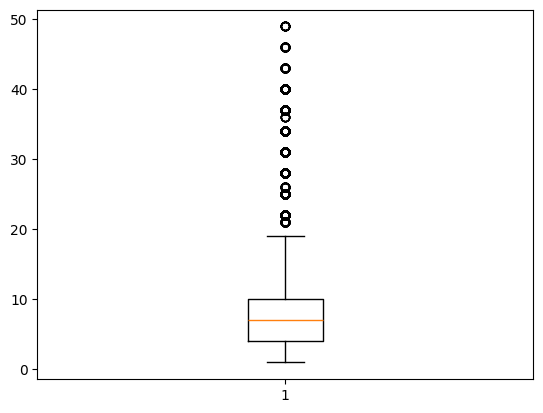

In [19]:
plt.boxplot(df['storey_upperbound'])
plt.show()

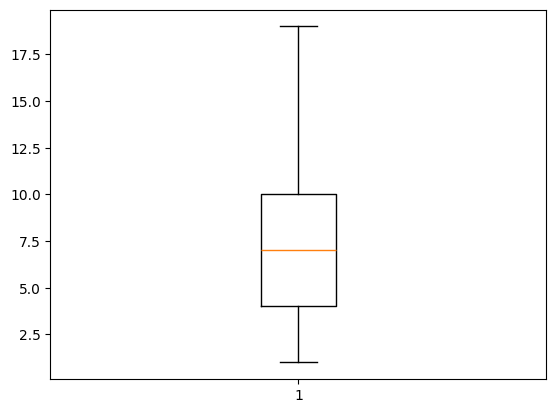

In [20]:
Q1 = df['storey_upperbound'].quantile(0.25)
Q2 = df['storey_upperbound'].quantile(0.75)
IQR = Q2-Q1
lb=Q1-1.5*IQR
up=Q2+1.5*IQR
df.storey_upperbound = df.storey_upperbound.clip(lb , up)
plt.boxplot(df['storey_upperbound'])
plt.show()

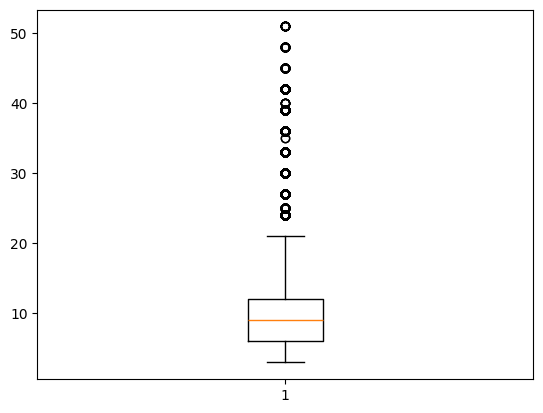

In [21]:
plt.boxplot(df['storey_lowerbound'])
plt.show()

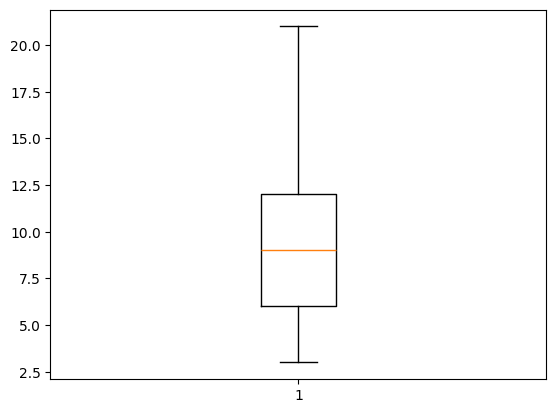

In [22]:
Q1 = df['storey_lowerbound'].quantile(0.25)
Q2 = df['storey_lowerbound'].quantile(0.75)
IQR = Q2-Q1
lb=Q1-1.5*IQR
up=Q2+1.5*IQR
df.storey_lowerbound = df.storey_lowerbound.clip(lb , up)
plt.boxplot(df['storey_lowerbound'])
plt.show()

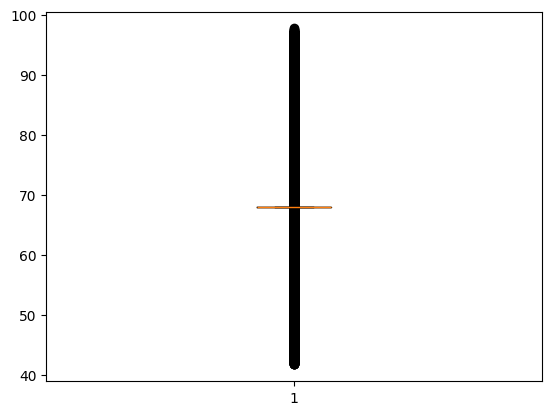

In [23]:
plt.boxplot(df['remaining_lease'])
plt.show()  

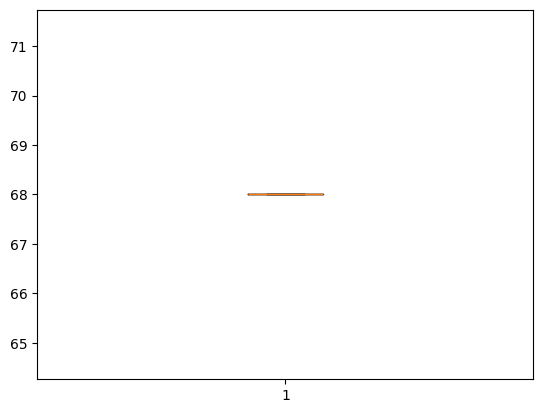

In [24]:
Q1 = df['remaining_lease'].quantile(0.25)
Q2 = df['remaining_lease'].quantile(0.75)
IQR = Q2-Q1
lb=Q1-1.5*IQR
up=Q2+1.5*IQR
df.remaining_lease = df.remaining_lease.clip(lb , up)
plt.boxplot(df['remaining_lease'])
plt.show()

Encoding categorical values
Here i use lable encoder 

In [25]:
df1 = df.copy()
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [ ]:
street = df1['street_name'].unique()
st_map = {street: idx + 1 for idx,street in enumerate(street)}
st_map

In [27]:
df1['street_name'] =  df1['street_name'].map(st_map)
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12


In [28]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [29]:
flat_map = {'1 ROOM':1,'2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6,
       'MULTI GENERATION':7}
df1['flat_type'] =  df1['flat_type'].map(flat_map)
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,ANG MO KIO,1,309.0,1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12


In [30]:
df1['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'Multi Generation',
       'PREMIUM APARTMENT', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [31]:
flatmodel_map = {'IMPROVED':1, 'NEW GENERATION':2, 'MODEL A':3, 'STANDARD':4, 'SIMPLIFIED':5,
       'MODEL A-MAISONETTE':6, 'APARTMENT':7, 'MAISONETTE':8, 'TERRACE':9,
       '2-ROOM' :10, 'IMPROVED-MAISONETTE' :11 , 'Multi Generation':12,
       'PREMIUM APARTMENT':13, 'Adjoined flat':14, 'Premium Maisonette':15,
       'Model A2':16, 'DBSS':17, 'Type S1':18, 'Type S2':19, 'Premium Apartment Loft':20,
       '3Gen':21}
df1['flat_model'] =  df1['flat_model'].map(flatmodel_map)
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,ANG MO KIO,1,309.0,1,31.0,1,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,1,1977,6000.0,68.0,1990,1,4,6


In [32]:
df1['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [33]:
town_map = {'ANG MO KIO':1, 'BEDOK':2, 'BISHAN':3, 'BUKIT BATOK':4, 'BUKIT MERAH':5,
       'BUKIT TIMAH':6, 'CENTRAL AREA':7, 'CHOA CHU KANG':8, 'CLEMENTI':9,
       'GEYLANG':10, 'HOUGANG':11, 'JURONG EAST':12, 'JURONG WEST':13,
       'KALLANG/WHAMPOA':14, 'MARINE PARADE':15, 'QUEENSTOWN':16, 'SENGKANG':17,
       'SERANGOON':18, 'TAMPINES':19, 'TOA PAYOH':20, 'WOODLANDS':21, 'YISHUN':22,
       'LIM CHU KANG':23, 'SEMBAWANG':24, 'BUKIT PANJANG':25, 'PASIR RIS':26,
       'PUNGGOL':27}
df1['town'] = df1['town'].map(town_map)
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,1,1,309.0,1,31.0,1,1977,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,1,1977,6000.0,68.0,1990,1,4,6


In [34]:
df1.to_csv('preprocessed_data.csv')

<Axes: >

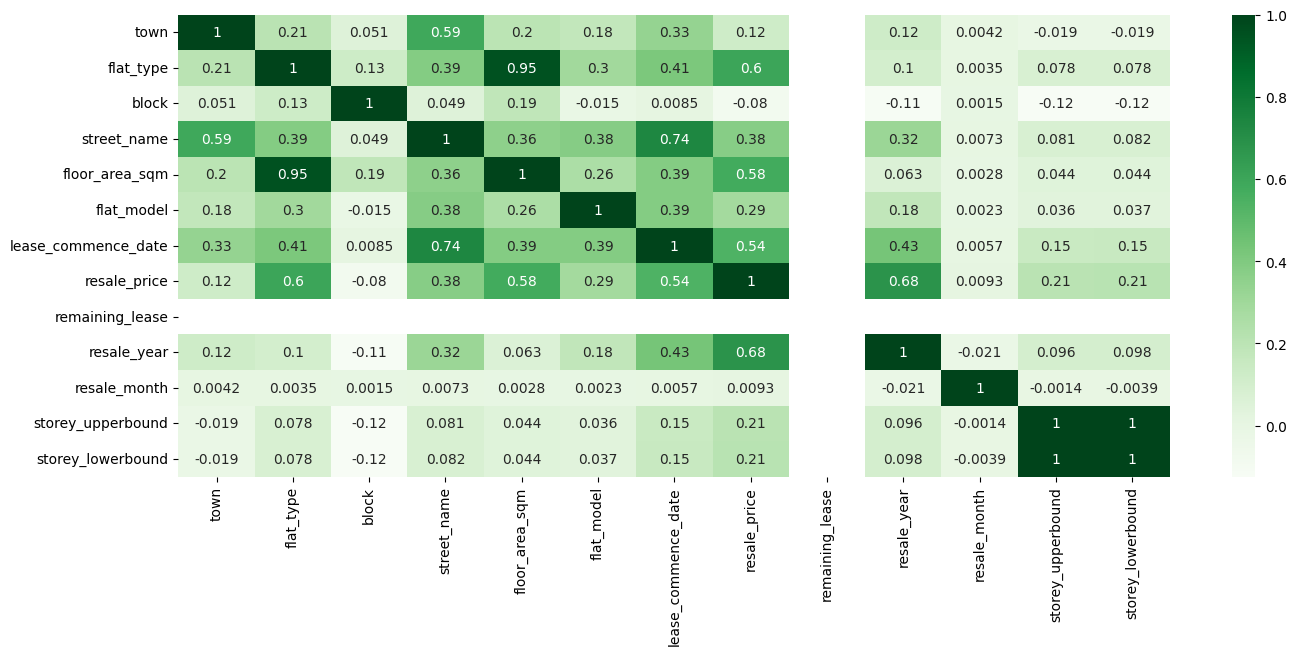

In [35]:
cor_rm = df1.corr()
plt.figure(figsize=(16,6))
sns.heatmap(cor_rm,annot=True,cmap='Greens')

In [36]:
df2 = pd.read_csv('preprocessed_data.csv')

In [37]:
df2.head(2)

,Unnamed: 0,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
0,0,1,1,309.0,1,31.0,1,1977,9000.0,68.0,1990,1,10,12
1,1,1,1,309.0,1,31.0,1,1977,6000.0,68.0,1990,1,4,6


In [38]:
X = df2.drop('resale_price', axis=1)
y = df2['resale_price'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=72)

In [39]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(736484, 13) (184122, 13) (736484,) (184122,)


In [40]:
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.neighbors import KNeighborsRegressor # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore
from sklearn.ensemble import RandomForestRegressor # type: ignore
import xgboost as xgb # type: ignore
from xgboost import XGBRegressor # type: ignore

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [42]:
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,y_train)
print(linear.predict(X_test))
print(y_test)

print(linear.score(X_test,y_test))


[270577.05125198 182248.26436974 388394.89296481 ... 259792.76336133
 270929.85404041 515225.47177801]
109940    291000.0
322053    196000.0
120267    515000.0
752930    588888.0
735544    638000.0
            ...   
195677    255000.0
302585    164000.0
329034    282000.0
469523    236000.0
734623    458000.0
Name: resale_price, Length: 184122, dtype: float64
0.7911959492490257


In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
print(X_test_sc,X_train_sc)

[[-0.2777426  -0.08385859  1.03809268 ...  1.59077951  0.09451397
   0.09125309]
 [-1.02845811 -0.59665352 -1.06984553 ... -1.6252778   0.09451397
   0.09125309]
 [-0.1735037  -1.49404465  2.09206178 ... -0.74817126 -0.57987788
  -0.58326206]
 ...
 [-0.95799511  0.68533381 -0.01587643 ... -1.04054011  0.09451397
   0.09125309]
 [ 0.45991786 -0.34025605 -0.01587643 ...  0.12893528 -0.57987788
  -0.58326206]
 [-0.58705452  0.42893634 -0.01587643 ...  0.71367297  1.44329769
   1.44028338]] [[ 1.28030057 -1.49404465 -1.06984553 ...  0.12893528  1.44329769
   1.44028338]
 [-1.03850123  0.55713508 -0.01587643 ...  1.29841067  0.76890583
   0.76576824]
 [-0.73628094 -0.72485225  1.03809268 ... -1.6252778   1.44329769
   1.44028338]
 ...
 [-0.67373559  1.45452621  1.03809268 ... -0.16343357  1.44329769
   1.44028338]
 [-1.20618201 -0.72485225 -0.01587643 ... -1.6252778   1.44329769
   1.44028338]
 [ 0.72619647 -1.23764719 -0.01587643 ...  0.71367297 -0.57987788
  -0.58326206]]


In [43]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_sc,y_train)
y_pre = knn_reg.predict(X_test_sc)

mean_ab_err_kn = mean_absolute_error(y_test,y_pre)
mean_sqr_err_kn = mean_squared_error(y_test,y_pre)
root_mean_sqr_err_kn = np.sqrt(mean_sqr_err_kn)
r2_score_kn = r2_score(y_test,y_pre)

print(mean_ab_err_kn)
print(mean_sqr_err_kn)
print(root_mean_sqr_err_kn)
print(r2_score_kn)


23282.721043666697
1256871306.181898
35452.380825297165
0.9518412874130845


In [12]:
y_pre

array([300400., 194400., 515400., ..., 274240., 227800., 451000.])

In [44]:
decision_tree = DecisionTreeRegressor(max_depth=20,random_state=11)
decision_tree.fit(X_train,y_train)
y_pre_dt = decision_tree.predict(X_test)

mean_ab_err_dt = mean_absolute_error(y_test,y_pre_dt)
mean_sqr_err_dt = mean_squared_error(y_test,y_pre_dt)
root_mean_sqr_err_dt = np.sqrt(mean_sqr_err_dt)
r2_dt = r2_score(y_test, y_pre_dt)

print(mean_ab_err_dt)
print(mean_sqr_err_dt)
print(root_mean_sqr_err_dt)
print(r2_dt)

17243.76225157514
667425223.6998775
25834.57419234692
0.9744267059297729


In [45]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)
y_pre_rf= rf_reg.predict(X_test)

mean_ab_err_rf = mean_absolute_error(y_test,y_pre_rf)
mean_sqr_err_rf = mean_squared_error(y_test,y_pre_rf)
root_mean_sqr_err_rf = np.sqrt(mean_sqr_err_rf)
r2_rf = r2_score(y_test, y_pre_rf)

print(mean_ab_err_rf)
print(mean_sqr_err_rf)
print(root_mean_sqr_err_rf)
print(r2_rf)


13613.646450875505
392342805.54740447
19807.645128772994
0.984966858329116


In [46]:
import plotly.express as px
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor']
score = [r2_score_kn,r2_dt, r2_rf]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9518412874130845
DecisionTreeRegressor 0.9744267059297729
RandomForestRegressor 0.984966858329116

Model: RandomForestRegressor contain Maximum R2_Score: 0.984966858329116 


In [47]:
model=rf_reg.fit(X_train, y_train)

In [48]:
model

RandomForestRegressor(random_state=42)

In [49]:
import pickle

filename = "trained_model1.pkl"
with open (filename,"wb") as file:
    pickle.dump(model,file)
print(f"model{model} saved")

modelRandomForestRegressor(random_state=42) saved


In [50]:
pre_chk = df2.sample(5)
pred = pre_chk.drop('resale_price', axis = 1)



In [51]:
pred

,Unnamed: 0,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_year,resale_month,storey_upperbound,storey_lowerbound
736742,81713,27,4,2.0,504,93.0,3,2016,68.0,2020,10,7,9
697701,42584,10,3,32.0,108,57.0,4,1973,68.0,2019,1,4,6
476342,190361,4,3,504.0,283,69.0,1,1988,68.0,2005,10,4,6
344887,58666,18,4,126.0,181,92.0,2,1985,68.0,2001,8,13,15
814096,159237,11,3,661.0,286,74.0,3,1987,68.0,2023,8,4,6


In [52]:
pre = rf_reg.predict(pred)
pre

array([488447.76, 220258.88, 150512.  , 209849.  , 392105.52])